In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a DataFrame
df = pd.read_csv('res_4_erc721_20_single.csv')

In [58]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            run  time_taken  iterations
count  10.00000   10.000000   10.000000
mean    5.50000  201.931238    6.200000
std     3.02765  108.351850    3.705851
min     1.00000   65.462207    2.000000
25%     3.25000  134.059829    2.500000
50%     5.50000  204.390624    6.000000
75%     7.75000  243.305217   10.000000
max    10.00000  437.364653   10.000000


In [59]:
# Count of verified vs. not verified
print("\nCount of Verified vs. Not Verified:")
print(df['verified'].value_counts())


Count of Verified vs. Not Verified:
verified
True     6
False    4
Name: count, dtype: int64


In [60]:
# Average time taken for verified and not verified runs
print("\nAverage Time Taken for Verified and Not Verified Runs (minutes:seconds):")
print(df.groupby('verified')['time_taken'].mean())


Average Time Taken for Verified and Not Verified Runs (minutes:seconds):
verified
False    297.345497
True     138.321732
Name: time_taken, dtype: float64


In [61]:
# Number of iterations for verified and not verified runs
print("\nAverage Iterations for Verified and Not Verified Runs:")
print(df.groupby('verified')['iterations'].mean().round())


Average Iterations for Verified and Not Verified Runs:
verified
False    10.0
True      4.0
Name: iterations, dtype: float64


In [62]:
def parse_status_logs(log):
    parsed_logs = {}
    if log:
        try:
            # Manually split the logs and process each entry
            log_list = log.strip('[]').split('", "')
            for entry in log_list:
                interaction_logs = entry.split('\\n')
                interaction_number = None
                for interaction_log in interaction_logs:
                    if 'Iteraction:' in interaction_log:
                        interaction_number = int(interaction_log.split(': ')[1])
                        if interaction_number not in parsed_logs:
                            parsed_logs[interaction_number] = {}
                    if 'OK' in interaction_log or 'ERROR' in interaction_log:
                        parts = interaction_log.split(': ')
                        method = parts[0].split('::')[1]
                        status = parts[1].strip()
                        if interaction_number is not None:
                            parsed_logs[interaction_number][method] = status
        except Exception as e:
            print(f"Error parsing log: {e}")
    return parsed_logs

# Apply the parse_status_logs function to each row's status column
df['parsed_status'] = df['status'].apply(parse_status_logs)

print("\nParsed Status:")
print(df['parsed_status'])



Parsed Status:
0    {1: {'supportsInterface': 'OK', '[constructor]...
1    {1: {'supportsInterface': 'OK', '[constructor]...
2    {1: {'supportsInterface': 'OK', '[constructor]...
3    {1: {'supportsInterface': 'OK', '[constructor]...
4                                                   {}
5    {3: {'supportsInterface': 'OK', '[constructor]...
6                                                   {}
7    {2: {'supportsInterface': 'OK', '[constructor]...
8    {4: {'supportsInterface': 'OK', '[constructor]...
9                                                   {}
Name: parsed_status, dtype: object


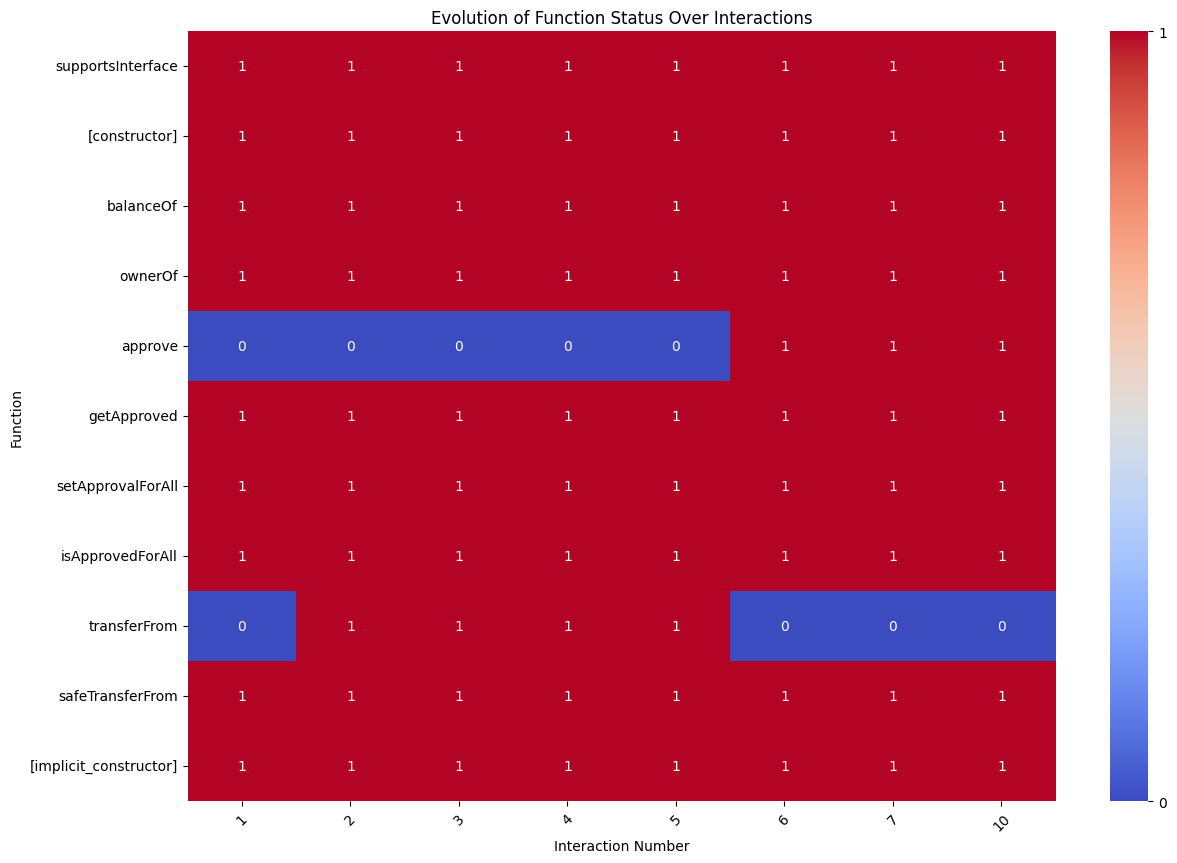

In [63]:
# Create a dictionary to hold the data for plotting
plot_data = {}

# Extract data for plotting
for parsed_log in df['parsed_status']:
    for interaction, methods in parsed_log.items():
        if interaction not in plot_data:
            plot_data[interaction] = {}
        for method, status in methods.items():
            if method not in plot_data[interaction]:
                plot_data[interaction][method] = status

# Create a DataFrame from the plot data
plot_df = pd.DataFrame.from_dict(plot_data, orient='index')

# Convert 'OK'/'ERROR' to numerical values (OK = 1, ERROR = 0)
plot_df = plot_df.applymap(lambda x: 1 if x == 'OK' else 0)

# Sort the DataFrame by interaction numbers
plot_df = plot_df.sort_index()

# Plot a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(plot_df.T, cmap='coolwarm', cbar_kws={'ticks': [0, 1]}, annot=True, fmt='d')
plt.xlabel('Interaction Number')
plt.ylabel('Function')
plt.title('Evolution of Function Status Over Interactions')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

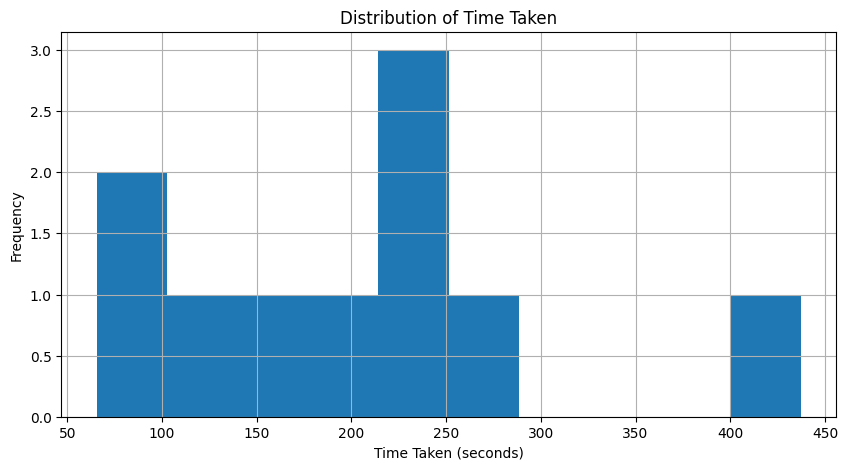

In [64]:
# Plot the distribution of time taken
plt.figure(figsize=(10, 5))
df['time_taken'].hist(bins=10)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Frequency')
plt.savefig('time_taken_distribution.png')
plt.show()

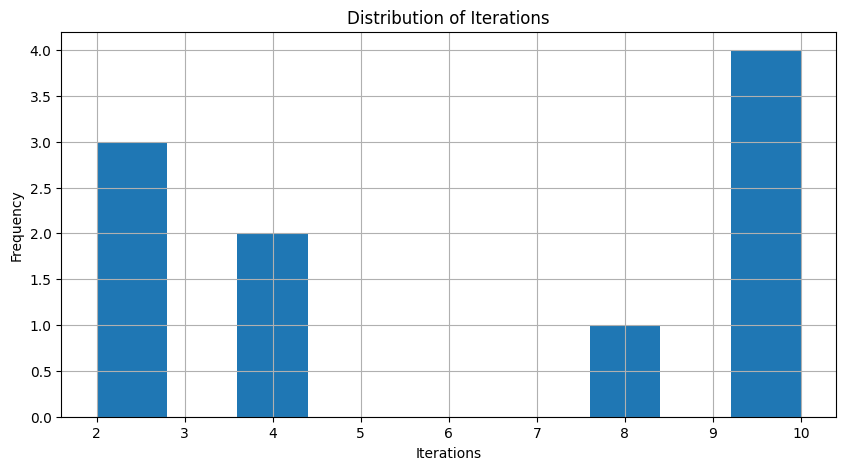

In [65]:
# Plot the distribution of iterations
plt.figure(figsize=(10, 5))
df['iterations'].hist(bins=10)
plt.title('Distribution of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Plot the average time taken for verified vs. not verified runs
avg_time_taken = df.groupby('verified')['time_taken'].mean()
print(avg_time_taken)

verified
False    297.345497
True     138.321732
Name: time_taken, dtype: float64


In [67]:
# Plot the average iterations for verified vs. not verified runs
avg_iterations = df.groupby('verified')['iterations'].mean()
print(avg_iterations)

verified
False    10.000000
True      3.666667
Name: iterations, dtype: float64
